In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
df=pd.read_csv('customer_shopping_behavior.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


#Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df.shape

(3900, 18)

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


**From this we come to know that we  have 37 NULL VALUES in review rating column**

#Filling Null Values

In [ ]:
df['Review Rating']=df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

**Null values in the Review Rating column have been filled using the median value specific to each category. This ensures that the imputation respects the distribution within each category instead of using a single global median.**

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace(' ','_')
df= df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

#Create a column age group

In [ ]:
labels = ['Young Adult','Adult','Middle aged','Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

In [ ]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle aged
1,19,Young Adult
2,50,Middle aged
3,21,Young Adult
4,45,Middle aged
5,46,Middle aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle aged


#Create colume purchase_frequency_days

In [ ]:
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14 ,
    'Annually' : 365 ,
    'Every 3 months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [ ]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14.0,Fortnightly
1,14.0,Fortnightly
2,7.0,Weekly
3,7.0,Weekly
4,365.0,Annually
5,7.0,Weekly
6,90.0,Quarterly
7,7.0,Weekly
8,365.0,Annually
9,90.0,Quarterly


In [ ]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [ ]:
(df['discount_applied']== df['promo_code_used']).all()

np.True_

**Note: This statement verifies if the columns discount_applied and promo_code_used have the same values across every record in the DataFrame.
It returns True only if all corresponding entries match; otherwise, it returns False.**

In [ ]:
df = df.drop('promo_code_used', axis=1)

**The column promo_code_used was dropped after verifying that its values were identical to discount_applied. Since duplicate features can lead to multicollinearity and unnecessary data repetition, retaining just one column helps maintain a cleaner and more efficient dataset.**

In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [ ]:
from google.colab import files
df.to_csv('customer_shopping_behavior_cleaned.csv', index=False)
files.download('customer_shopping_behavior_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle aged,14.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle aged,7.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle aged,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,32,Venmo,Weekly,Adult,7.0
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly,Middle aged,14.0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,24,Venmo,Quarterly,Middle aged,90.0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,24,Venmo,Weekly,Adult,7.0


# UNIVARIATE ANALYSIS

In [ ]:
# Numerical columns distribution
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

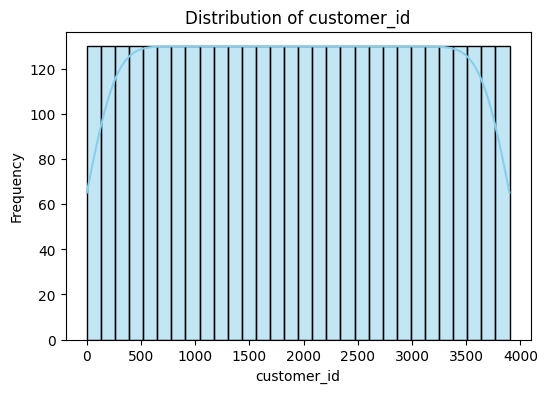

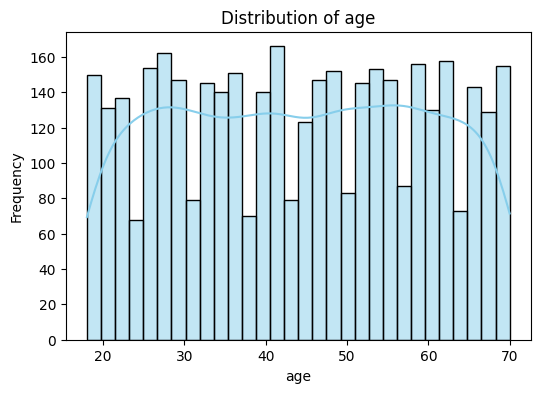

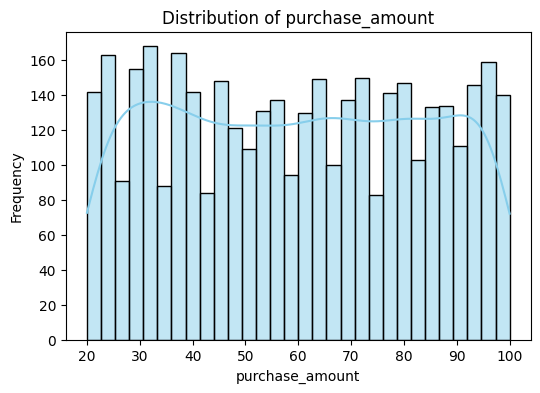

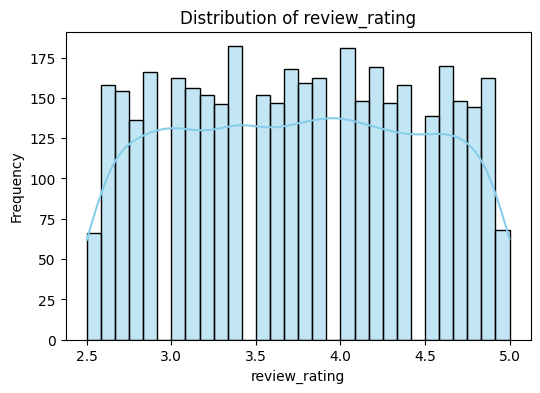

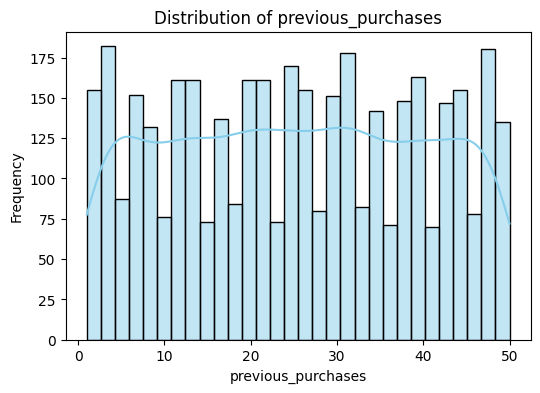

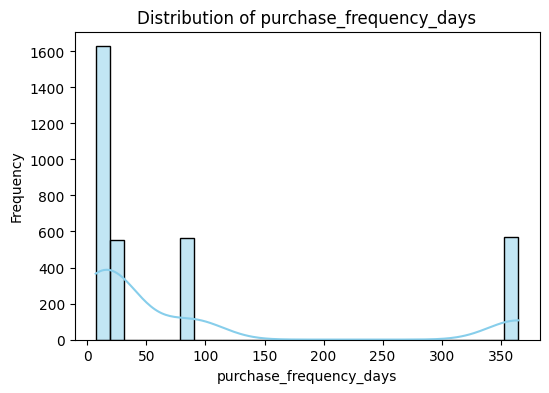

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


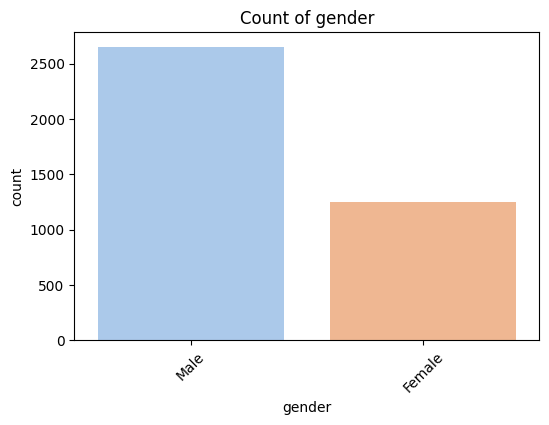

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


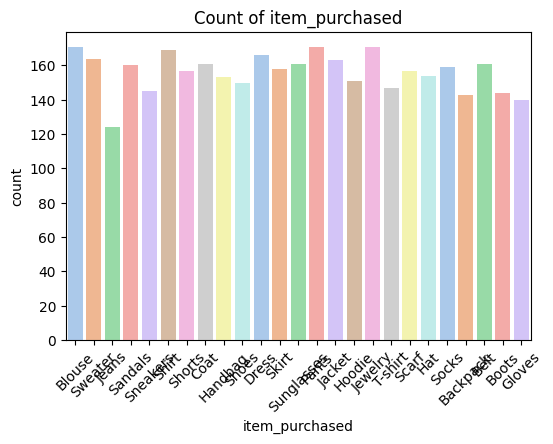

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


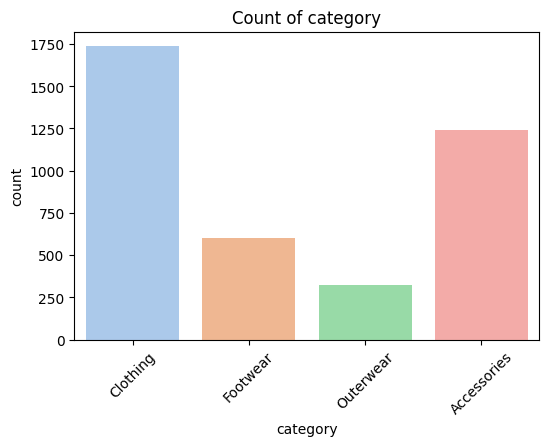

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


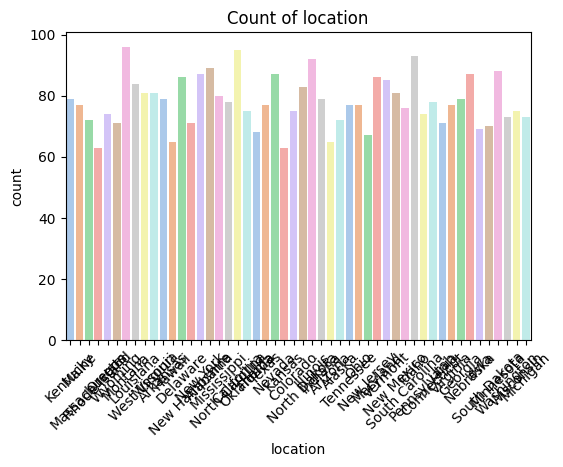

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


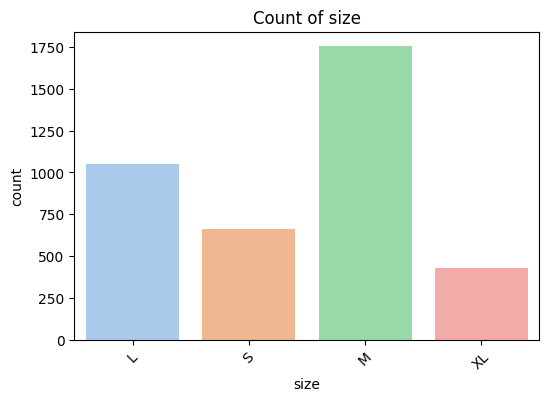

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


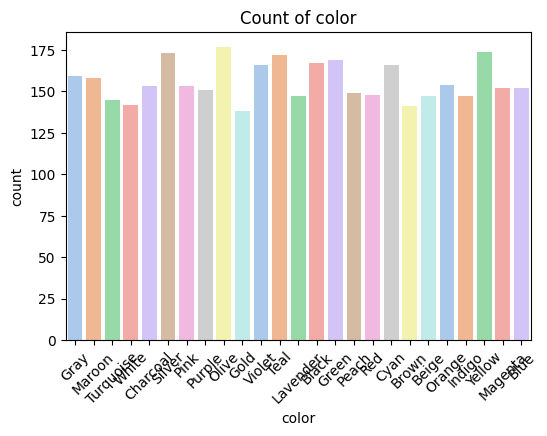

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


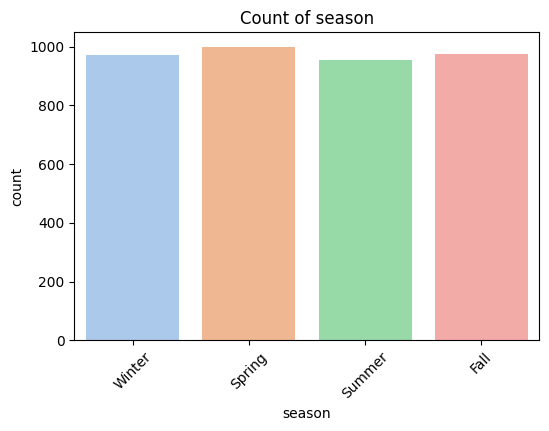

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


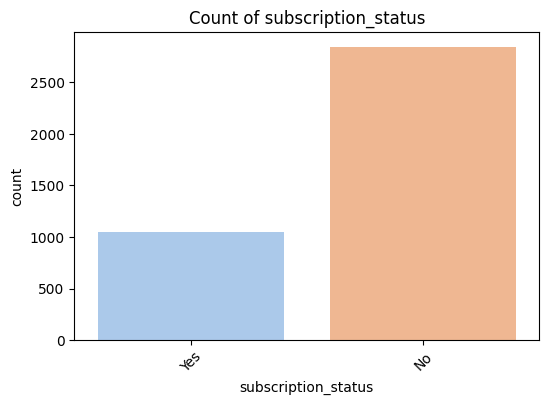

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


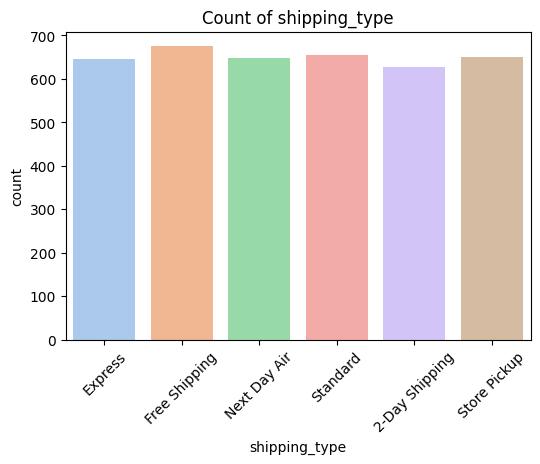

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


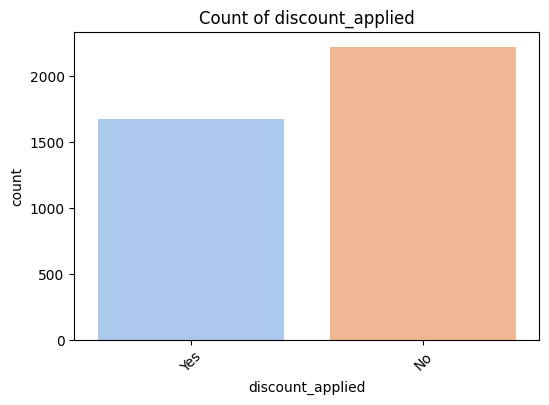

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


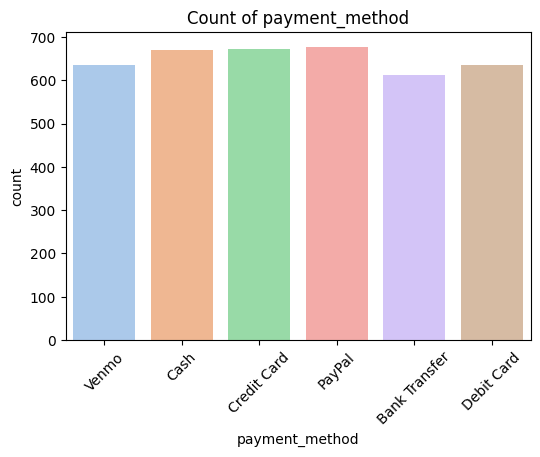

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


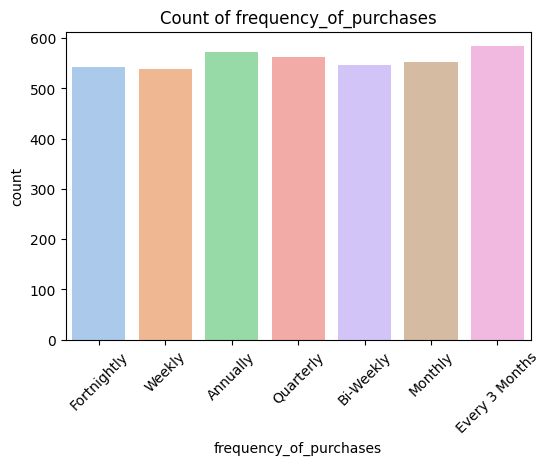

/tmp/ipython-input-1121989312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


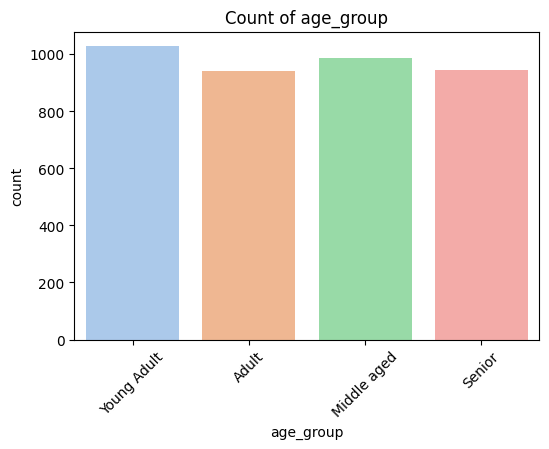

In [ ]:
# Categorical columns countplot
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Summary statistics
print("\n📊 Summary Statistics:\n")
display(df.describe(include='all').transpose())


📊 Summary Statistics:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_amount,3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#BIVARIATE ANALYSIS

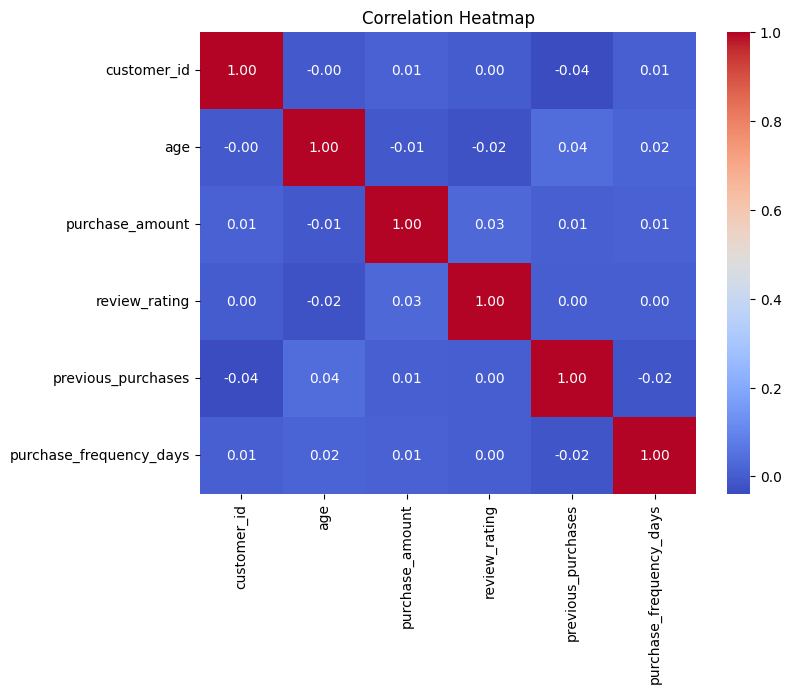

In [ ]:
# Numerical vs Numerical: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Numerical vs Categorical: Boxplots
num_var = 'Purchase Amount' if 'Purchase Amount' in df.columns else num_cols[0]


/tmp/ipython-input-2266958608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num_var, palette="viridis")


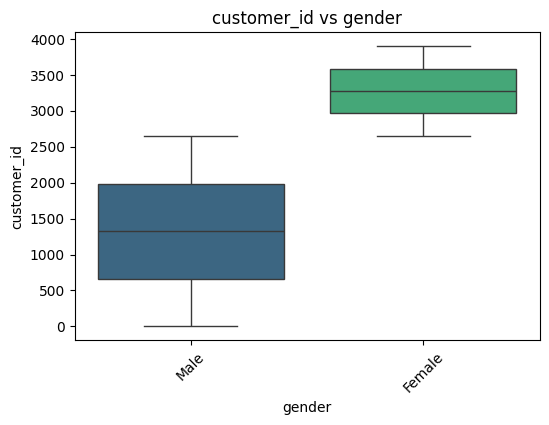

/tmp/ipython-input-2266958608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num_var, palette="viridis")


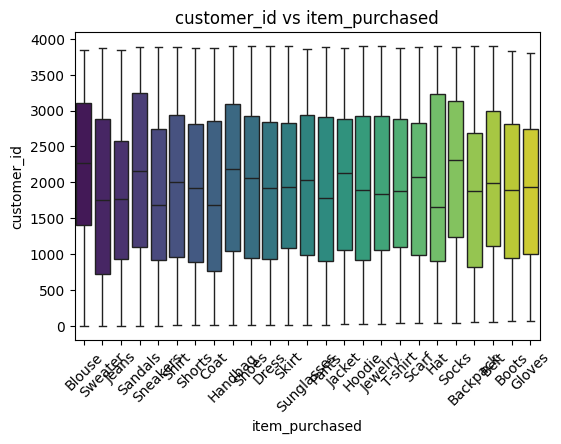

/tmp/ipython-input-2266958608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num_var, palette="viridis")


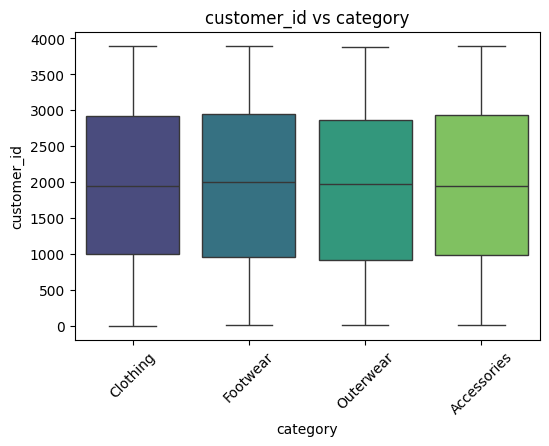

/tmp/ipython-input-2266958608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num_var, palette="viridis")


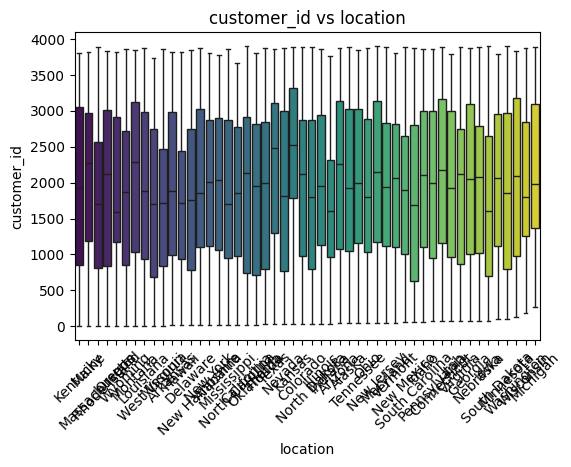

In [ ]:
for cat in cat_cols[:4]:  # limit to first few categorical vars
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=cat, y=num_var, palette="viridis")
    plt.title(f"{num_var} vs {cat}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Categorical vs Categorical: Crosstab
if len(cat_cols) >= 2:
    cross = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]], normalize='index') * 100
    print(f"\n📈 Crosstab between {cat_cols[0]} and {cat_cols[1]}:\n")
    display(cross)


📈 Crosstab between gender and item_purchased:



item_purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
gender,,,,,,,,,,,,,,,,,,,,,
Female,2.964744,4.407051,5.288462,4.006410,3.766026,4.166667,2.964744,4.647436,4.166667,4.086538,...,3.605769,4.727564,3.846154,3.846154,3.926282,3.365385,4.647436,4.487179,4.006410,3.685897
Male,3.996983,3.996983,3.959276,3.544495,4.298643,4.298643,3.883861,3.582202,3.846154,3.770739,...,4.223228,4.147813,3.846154,4.110106,4.110106,3.883861,3.808446,3.959276,4.298643,3.808446


#MULTIVARIATE ANALYSIS

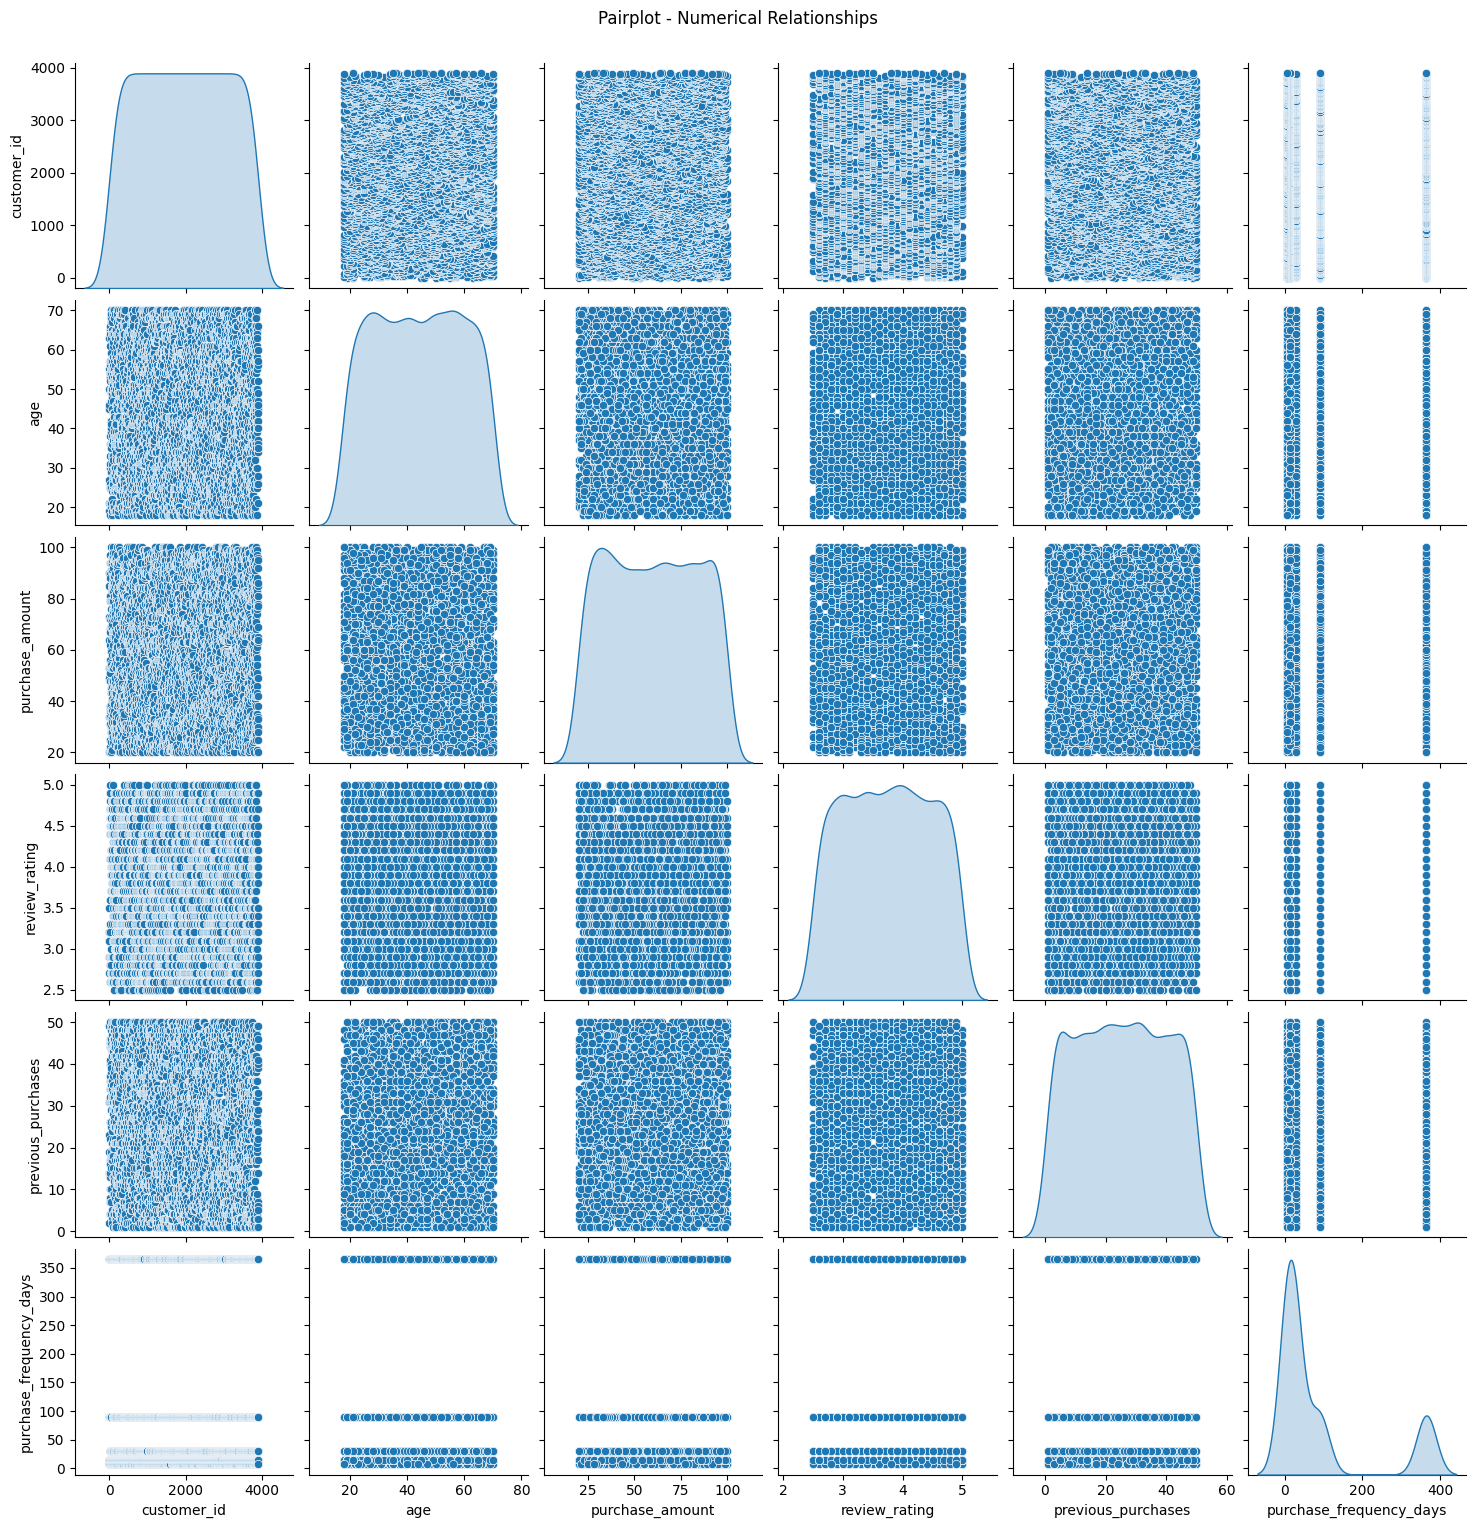

In [ ]:
# Pairplot (relationship among numerical features)
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairplot - Numerical Relationships", y=1.02)
plt.show()

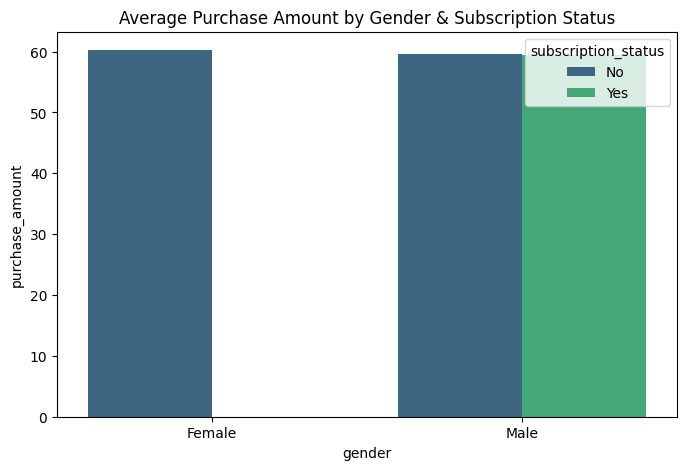

In [38]:
# Multivariate: Effect of multiple categories on revenue/spend
plt.figure(figsize=(8,5))
avg_df = df.groupby(['gender','subscription_status'])['purchase_amount'].mean().reset_index()
sns.barplot(data=avg_df, x='gender', y='purchase_amount', hue='subscription_status', palette='viridis')
plt.title("Average Purchase Amount by Gender & Subscription Status")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


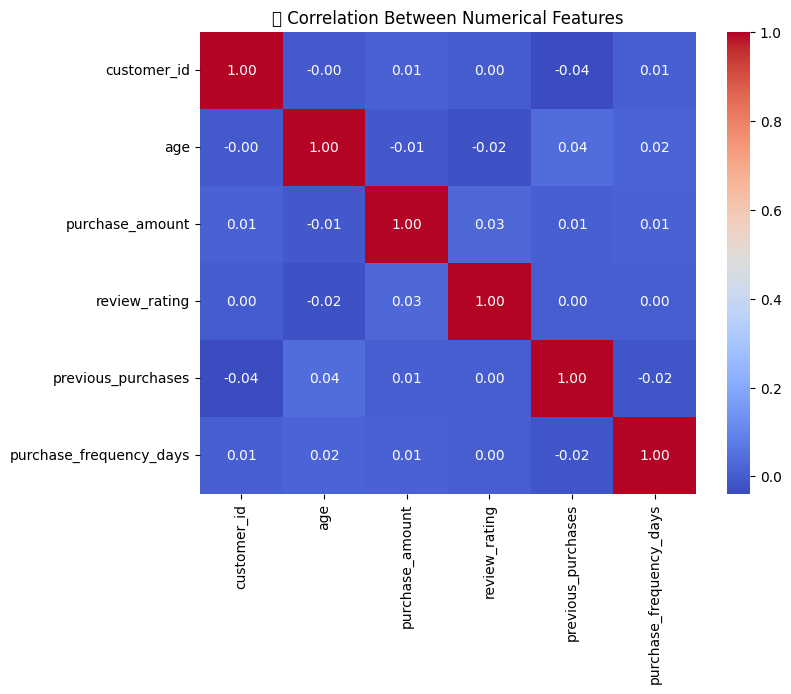

In [39]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Between Numerical Features")
plt.show()

In [40]:
# Average spend by gender and subscription
group_insight = df.groupby(['gender', 'subscription_status'])['purchase_amount'].agg(['mean', 'count']).round(2)
display(group_insight)

# Total revenue by product category
category_revenue = df.groupby('category')['purchase_amount'].sum().sort_values(ascending=False)
print("\n💰 Revenue by Category:\n", category_revenue)


mean  count
gender subscription_status              
Female No                   60.25   1248
Male   No                   59.57   1599
       Yes                  59.49   1053


💰 Revenue by Category:
 category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: purchase_amount, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


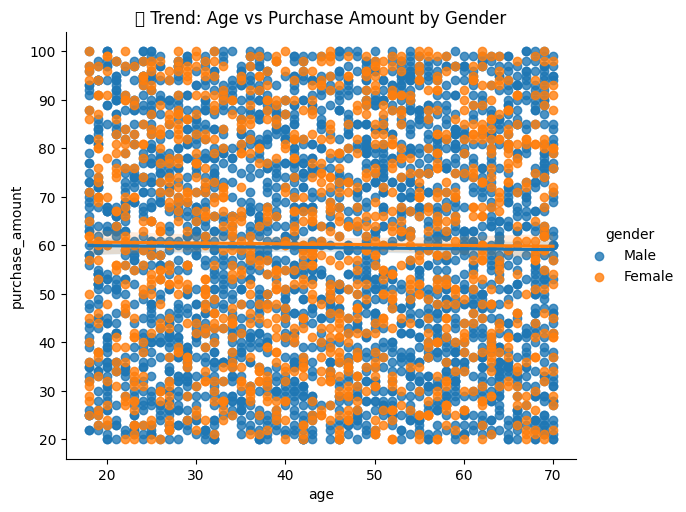

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


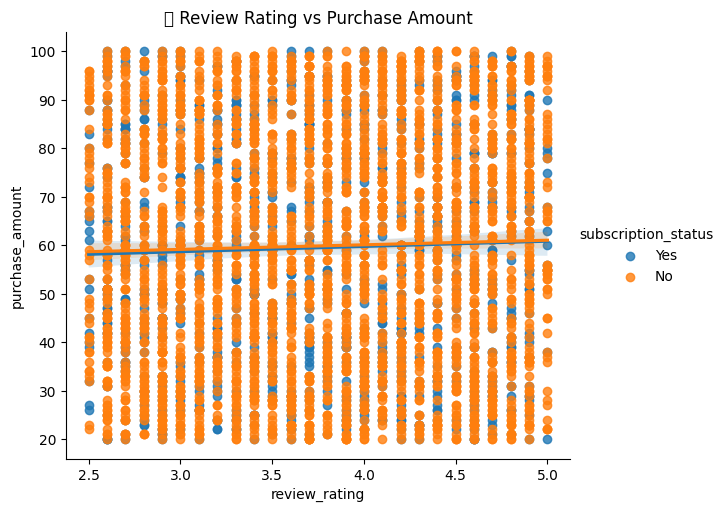

In [41]:
# Simple linear trend: Purchase amount vs Age
sns.lmplot(data=df, x='age', y='purchase_amount', hue='gender', aspect=1.2, height=5)
plt.title("📈 Trend: Age vs Purchase Amount by Gender")
plt.show()

# Review rating vs purchase amount
sns.lmplot(data=df, x='review_rating', y='purchase_amount', hue='subscription_status', aspect=1.2, height=5)
plt.title("⭐ Review Rating vs Purchase Amount")
plt.show()


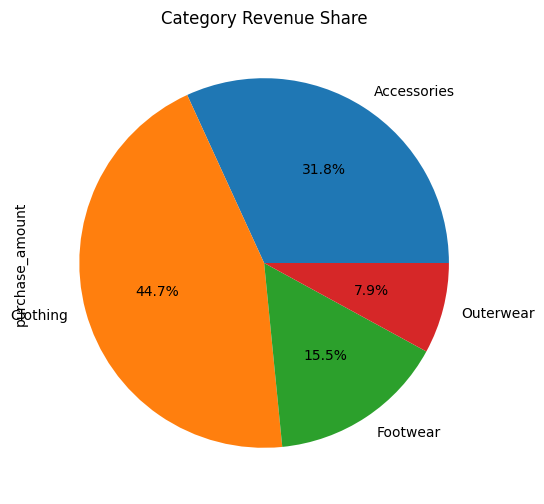

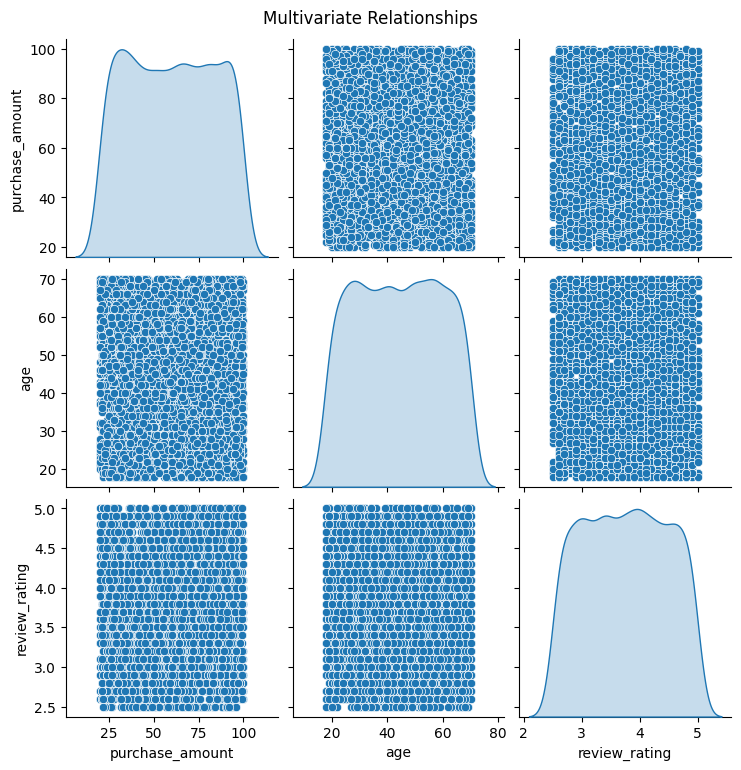

In [42]:
# Revenue share by category (pie chart)
category_share = df.groupby('category')['purchase_amount'].sum()
category_share.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Category Revenue Share')

# Relationship grid (pairplot)
sns.pairplot(df[['purchase_amount', 'age', 'review_rating']], diag_kind='kde')
plt.suptitle("Multivariate Relationships", y=1.02)
plt.show()
